## **Linear Algebra(CpE210A)**

#### **Laboratory 2: Plotting Vectors Using NumPy and MatPlotLib**
Coded And Submitted By: 

*Santos,Franz Nico S.*

*58011*

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline


# **Part 1: Skyline Eagle Fly**



In [9]:
def track_eagle(make_figs=False):
    lng =np.random.randint(-10,10, size=3) 
    lat = np.random.randint(-10,10, size=3)
    dist1 = np.array([lng[0],lat[0]])                           
    dist2 = np.array([lng[1],lat[1]]) 
    dist3 = np.array([lng[2],lat[2]]) 
    
    dist_total = dist1 + dist2 + dist3                       
    disp = np.linalg.norm(dist_total)                             
    alpha = 10**-6
    theta = np.arctan(dist_total[1]/(dist_total[0]+alpha))                           
    theta = np.degrees(theta)
    print (dist1)
    print (dist2)
    print (dist3)
    print (dist_total)
    print (disp)
    print (theta)
    
    plt.figure(figsize=(10,10))
    plt.title('Philippine Eagle Flight Plotter')
    plt.xlim(-30, 30)
    plt.ylim(-30, 30)
    plt.xlabel('Latitudinal Distance')
    plt.ylabel('Longitudinal Distance')
    plt.grid()
    n = 2
    
    plt.quiver(0,0, dist1[0], dist1[1], 
               angles='xy', scale_units='xy',scale=1, color='red', 
               label='Trajectory 1: {:.2f}m.'.format(np.linalg.norm(dist1)))
    plt.quiver(dist1[0], dist1[1], dist2[0], dist2[1], 
               angles='xy', scale_units='xy',scale=1, color='blue',
              label='Trajectory 2: {:.2f}m.'.format(np.linalg.norm(dist2)))
    plt.quiver(np.add(dist1[0],dist2[0]), np.add(dist1[1],dist2[1]),
               dist3[0], dist3[1], angles='xy', scale_units='xy',scale=1, color='green',
              label='Trajectory 3: {:.2f}m.'.format(np.linalg.norm(dist3)))
    plt.quiver(0,0, dist_total[0], dist_total[1], 
               angles='xy', scale_units='xy',scale=1, color='orange',
              label='Displacement: {:.2f}m. @ {:.2f}'.format(disp, theta))
    
    plt.legend()
    
    if make_figs:
        plt.savefig(f'LinAlg-Lab2-PH Eagle-{int(disp)}@{int(theta)}.png', dpi=300)
    
    plt.show()
   
     
    
  

[7 9]
[ 8 -3]
[ 7 -1]
[22  5]
22.561028345356956
12.804265502459863


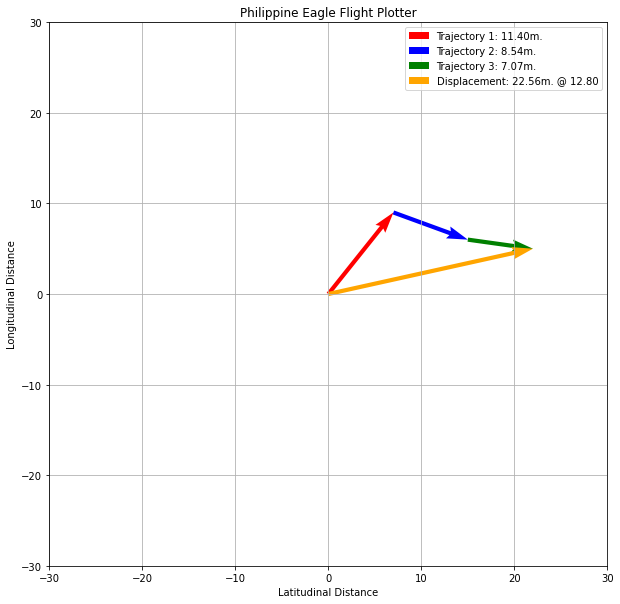

In [33]:
track_eagle()

# **Part 2: Reverse Engineering**

Your project manager found out that the previous engineer that handled the project did some sort of algorithm regarding the eagles. He gave you the piece code for you to analyze and required you to make a documentation out of it. The code is given below.

In [110]:
def eagle_kinematics(s, t):
    req_shape = 4
    v = np.zeros((req_shape-1,))   #return array with zeros
    a = np.zeros((req_shape-1,))
    t_vect = np.array([t**3, t**2, t, 1]) #double astersk is for exponentiation
    if s.shape == (req_shape,):
        v = np.array([3*s[0],2*s[1], s[2]]) #s = x = 2,1,3,2 (3*2,2*1)s[2]= 3 v = [6,2,3]
        a = np.array([2*v[0],v[1]])         #v = 6,2,3 (2*(6)), v[1] = 2      a = [12, 2]
        s_total = np.sum(np.multiply(s, t_vect)) #s = 2,1,3,2 t_vect = 8,4,2,1
        v_total = np.sum(np.multiply(v, t_vect[1:])) #v = 6,2,3 t_vect = 4, 2, 1 he used slice operator
        a_total = np.sum(np.multiply(a, t_vect[2:])) #a = 12,2 t_vect = 2,1
        
    else:
        print(f'Input displacement vector is not valid. Make sure that the vector shape is ({req_shape},)')
    print (t_vect)
    print (s_total)
    print (v_total)
    print (a_total)
    print (s)
    print (v)
    print (a)
    return s_total, v_total, a_total

In [111]:
x = np.array([2,1,3,2])
t = 2
eagle_kinematics(x, t)

[8 4 2 1]
28
31
26
[2 1 3 2]
[6 2 3]
[12  2]


(28, 31, 26)

# **Part 3: Bebang's Online Business**

You have a friend named Bebang who has an online business in which she sells donuts. She asks you to make something that helps her to observe the increase and decrease of her profit considering the reach of her online posts. As novice data analytic engineers, you suggest to make a plotter using vectors of her weekly profit and FB post reach for a month. She is amazed that you have this idea and will pay you 15,000 PHP for the program. Thus you venture in implementing your idea with the PH Eagle Tracker as the base code.

In [296]:
def month_profit_trace(profit, reach, make_figs=True): ## You can simplify/ optimize this code for extra points
    profit= np.array([-18000, 3000, 12000, 10000])    
    reach = np.array([1000, 100, 500, 10])
    if (profit.shape == (4,)) and (reach.shape == (4,)): 
        week1 = np.array((reach[0], profit[0]))       
        week2 = np.array((reach[1], profit[1])) 
        week3 = np.array((reach[2], profit[2])) 
        week4 = np.array((reach[3], profit[3])) 
        
        week_total = week1 + week2 + week3 + week4 
        week_performance = np.linalg.norm(week_total)
        alpha = 10**-6
        reach_gradient = np.arctan(week_total[1]/(week_total[0]+alpha))        
        print (week1)
        print (week2)
        print (week3)
        print (week4)
        print (week_total)
        print (week_performance)
        
        
        

        plt.figure(figsize=(16,5))
        plt.title('Bebang\'s Month Post Efficiency')
        plt.xlim(0,1.01*np.sum(reach))
        plt.ylim(-np.sum(np.abs(profit)),np.sum(np.abs(profit)))
        plt.xlabel('FB Post Reach Increment')
        plt.ylabel('Profit')
        plt.grid()
        n = 2
        
        plt.quiver(0,0, week1[0], week1[1], 
                   angles='xy', scale_units='xy',scale=1, color='yellowgreen', width=0.0025,
                   label='Week 1: {:.2f}'.format(np.linalg.norm(week1)))
        plt.quiver(week1[0], week2[0], week1[1], week2[1],
                   angles='xy', scale_units='xy',scale=1, color='red', width=0.0025,
                   label='Week 2: {:.2f}'.format(np.linalg.norm(week2)))
        plt.quiver(np.add(week1[0],week2[0]), np.add(week1[1],week2[1]),
               week3[0], week3[1],
                   angles='xy', scale_units='xy',scale=1, color='blue', width=0.0025,
                   label='Week 3: {:.2f}'.format(np.linalg.norm(week3)))
       
        plt.quiver(np.add(week1[0],week3[0]), np.add(week1[1],week3[1]),
                week4[0], week4[1],
                   angles='xy', scale_units='xy',scale=1, color='purple', width=0.0025,
                   label='Week 4: {:.2f}'.format(np.linalg.norm(week4)))
        plt.quiver(0,0, week_total[0], week_total[1], 
                   angles='xy', scale_units='xy',scale=1, color='red', width=0.005,
                 label='Efficiency: {:.2f} @ {:.2f}'.format(week_performance, reach_gradient))

        plt.legend(loc='lower left')

        if make_figs:
            plt.savefig(f'LinAlg-Lab2-Bebang Post Eff-{int(week_performance)}@{int(reach_gradient)}.png', dpi=300)
        else:
            print('Dimension error')

        plt.show()

[  1000 -18000]
[ 100 3000]
[  500 12000]
[   10 10000]
[1610 7000]
7182.764091907794


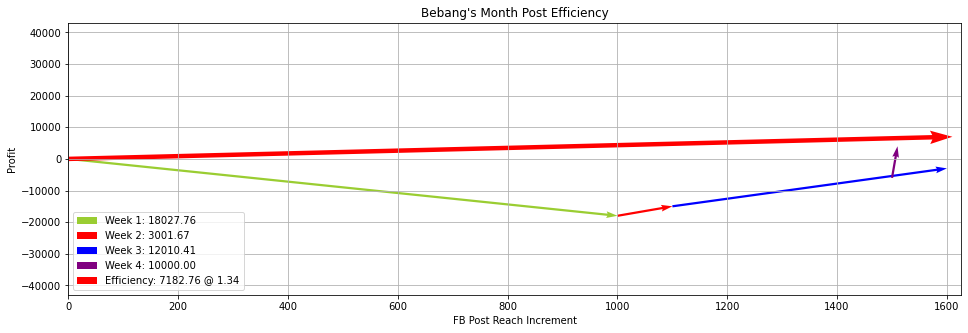

In [298]:
month_profit_trace(profit,reach)
